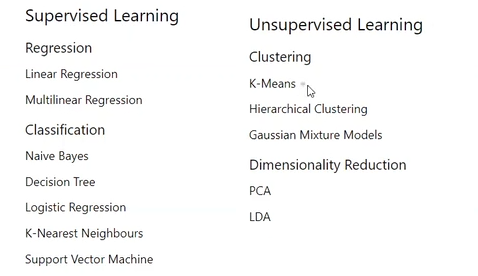

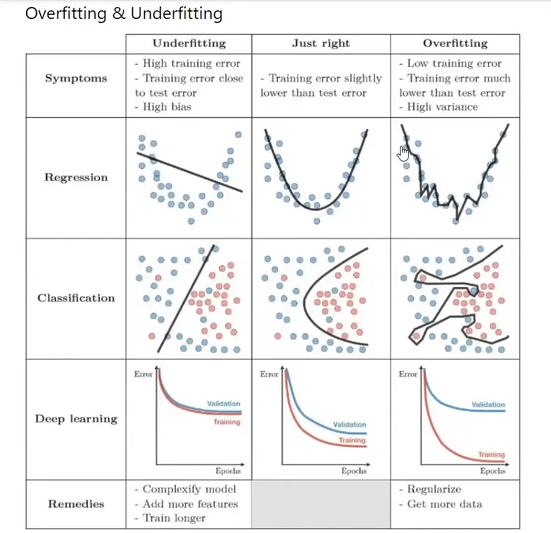

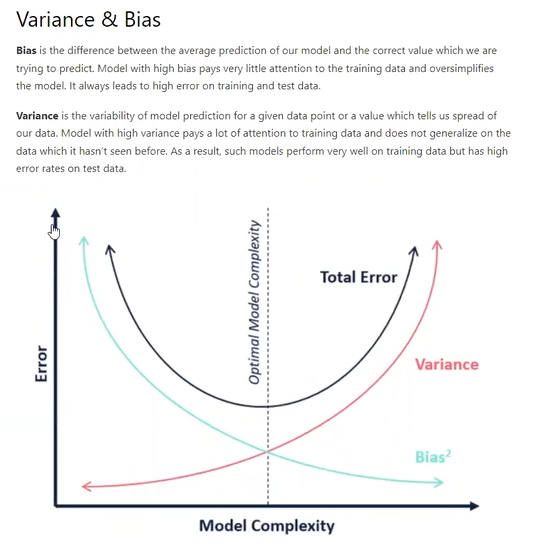

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
file_path = "D:\\lh_data\\geophysics\\well1.csv"
file_path

'D:\\lh_data\\geophysics\\well1.csv'

In [7]:
# loading LAS as numpy array
data = pd.read_csv(file_path)
data

,DEPTH,RHOB,DT,GR,FACIES
0,48.0000,NaN,524.0485,NaN,1
1,48.1500,NaN,524.0410,NaN,1
2,48.3000,NaN,524.0336,NaN,1
3,48.4500,NaN,524.0262,NaN,1
4,48.6000,NaN,524.0190,NaN,1
...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,1
9676,1499.4000,1814.1691,534.8610,28.5281,1
9677,1499.5500,1861.6497,537.1902,28.5813,1
9678,1499.7001,1880.3978,537.2630,28.5813,1


(1499.8501, 48.0)

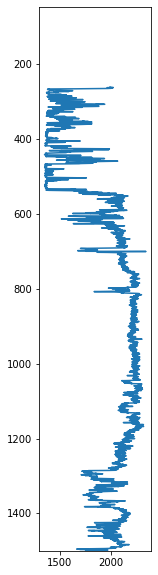

In [11]:
plt.figure(figsize=(2,10))
plt.plot(data.RHOB, data.DEPTH)
plt.ylim(max(data.DEPTH),min(data.DEPTH))

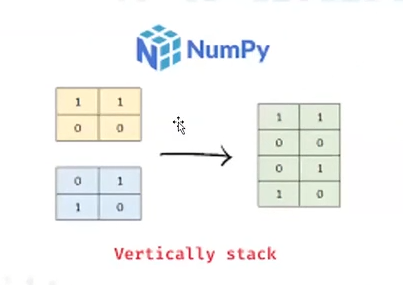

In [18]:
data.FACIES

0       1
1       1
2       1
3       1
4       1
       ..
9675    1
9676    1
9677    1
9678    1
9679    1
Name: FACIES, Length: 9680, dtype: int64

In [17]:
np.vstack(data.FACIES)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

Text(0.5, 1.0, 'FACIES')

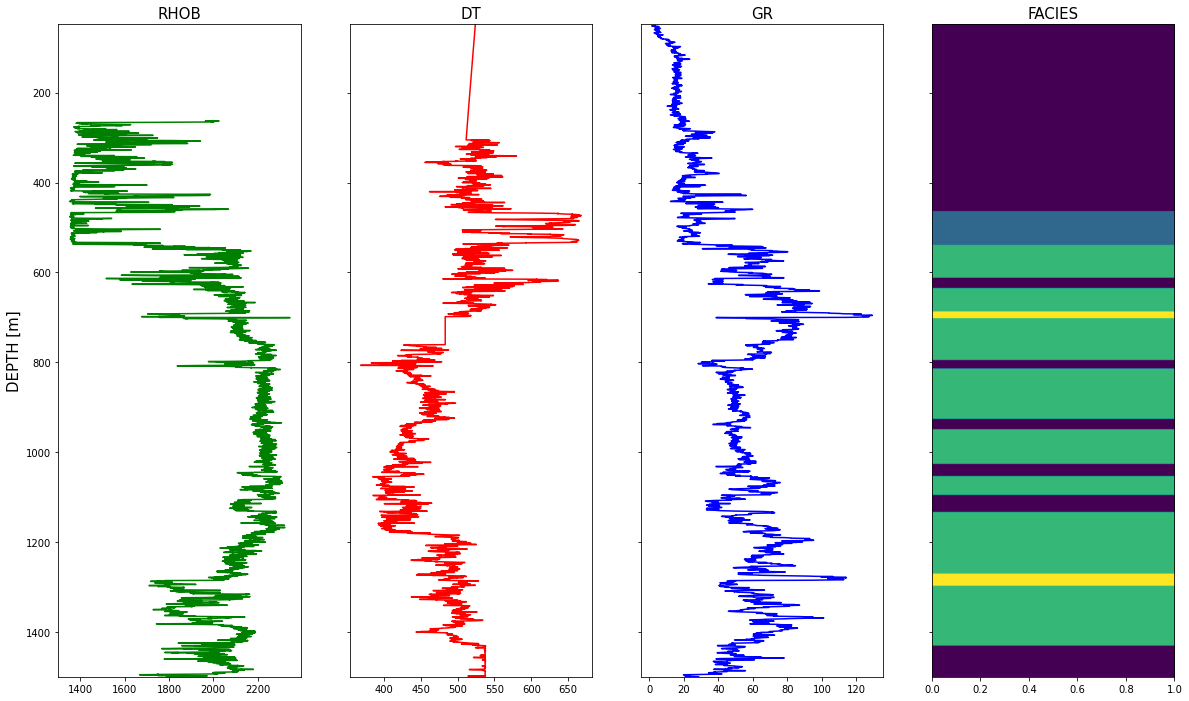

In [21]:
fig, ax = plt.subplots(1,4, figsize=(20,12), sharey=True)  # all the axis share the same y scale/orientation

ax[0].plot(data.RHOB, data.DEPTH, color="g")
ax[0].set_title("RHOB", fontsize=15)
ax[0].set_ylabel("DEPTH [m]", fontsize=15)
ax[0].set_ylim(max(data.DEPTH),min(data.DEPTH))

ax[1].plot(data.DT, data.DEPTH, color="r")
ax[1].set_title("DT", fontsize=15)

ax[2].plot(data.GR, data.DEPTH, color="b")
ax[2].set_title("GR", fontsize=15)

facies = np.vstack(data.FACIES)   

ax[3].imshow(facies, aspect="auto", extent=[0,1,max(data.DEPTH),min(data.DEPTH)])  # DISPLAYS blocky character of facies
ax[3].set_title("FACIES", fontsize=15)


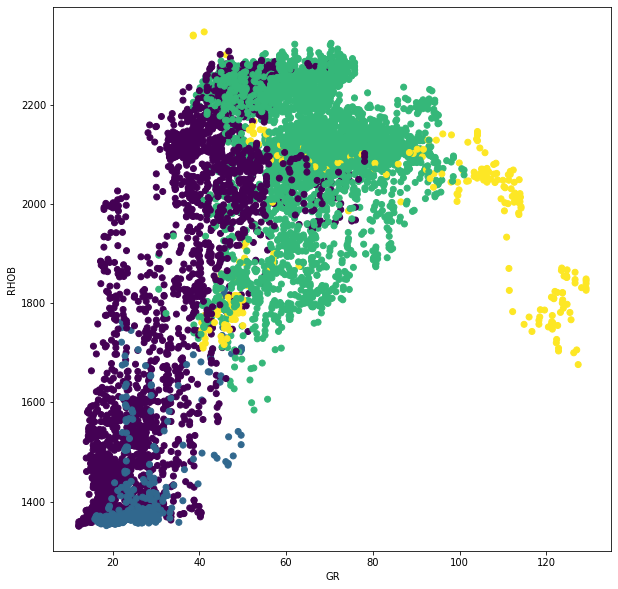

In [24]:

plt.figure(figsize=(10,10))
plt.xlabel("GR")
plt.ylabel("RHOB")
plt.scatter(data.GR, data.RHOB, c=data.FACIES)

Text(0.5, 1.0, 'FACIES')

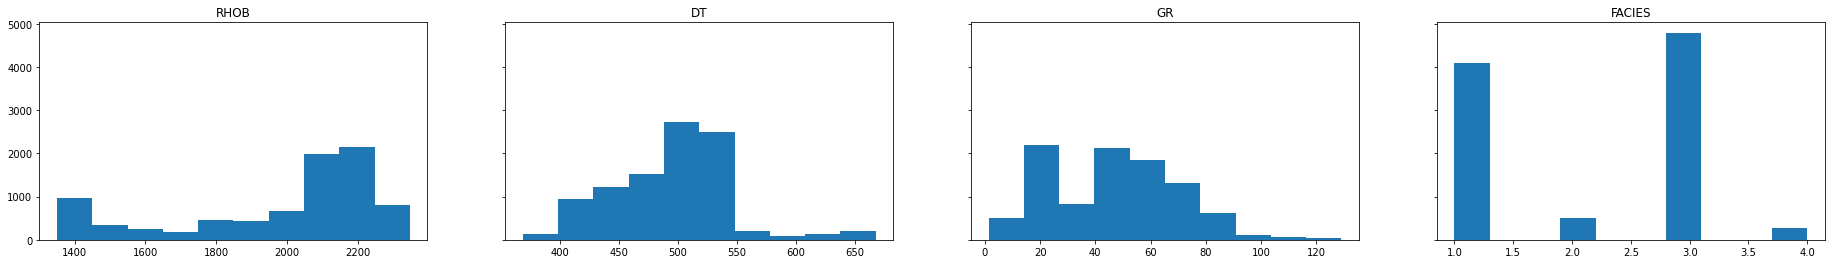

In [26]:
#EDA

fig, ax = plt.subplots(1,4, figsize=(32,4), sharey=True)  # all the axis share the same y scale/orientation
ax[0].hist(data.RHOB)
ax[0].set_title("RHOB")
ax[1].hist(data.DT)
ax[1].set_title("DT")
ax[2].hist(data.GR)
ax[2].set_title("GR")
ax[3].hist(data.FACIES)   # shows unbalance variable
ax[3].set_title("FACIES")

In [27]:
data.corr()

,DEPTH,RHOB,DT,GR,FACIES
DEPTH,1.000000,0.583196,-0.403733,0.646886,0.529961
RHOB,0.583196,1.000000,-0.711299,0.632652,0.502882
DT,-0.403733,-0.711299,1.000000,-0.342629,-0.316685
GR,0.646886,0.632652,-0.342629,1.000000,0.766206
FACIES,0.529961,0.502882,-0.316685,0.766206,1.000000


<AxesSubplot:>

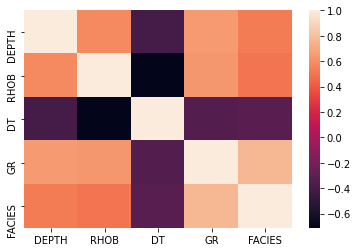

In [29]:
import seaborn as sns

sns.heatmap(data.corr())

<AxesSubplot:>

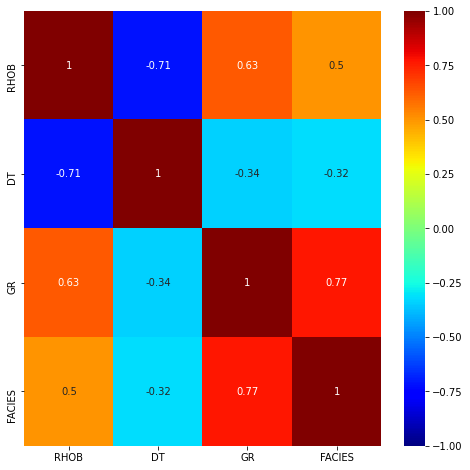

In [32]:
# drops:  0 for rows, 1 for columns
plt.figure(figsize=(8,8))
sns.heatmap(data.drop(["DEPTH"], axis=1).corr(), cmap="jet", annot=True , vmin=-1, vmax=1)

<AxesSubplot:>

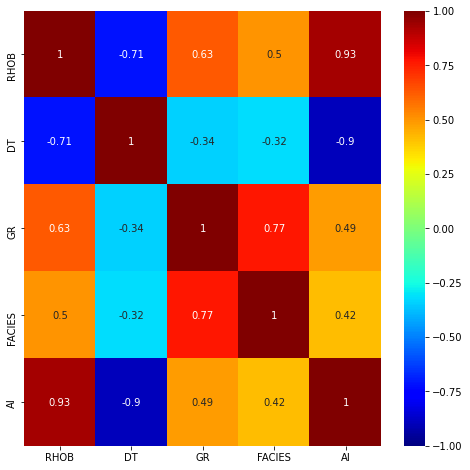

In [34]:
# create extra variable
plt.figure(figsize=(8,8))
data["AI"]=data.RHOB*((1/data.DT)*1000000)  # accoustic impedance
sns.heatmap(data.drop(["DEPTH"], axis=1).corr(), cmap="jet", annot=True , vmin=-1, vmax=1)

In [35]:
data = data.drop(["AI"], axis=1)

In [36]:
data

,DEPTH,RHOB,DT,GR,FACIES
0,48.0000,NaN,524.0485,NaN,1
1,48.1500,NaN,524.0410,NaN,1
2,48.3000,NaN,524.0336,NaN,1
3,48.4500,NaN,524.0262,NaN,1
4,48.6000,NaN,524.0190,NaN,1
...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,1
9676,1499.4000,1814.1691,534.8610,28.5281,1
9677,1499.5500,1861.6497,537.1902,28.5813,1
9678,1499.7001,1880.3978,537.2630,28.5813,1


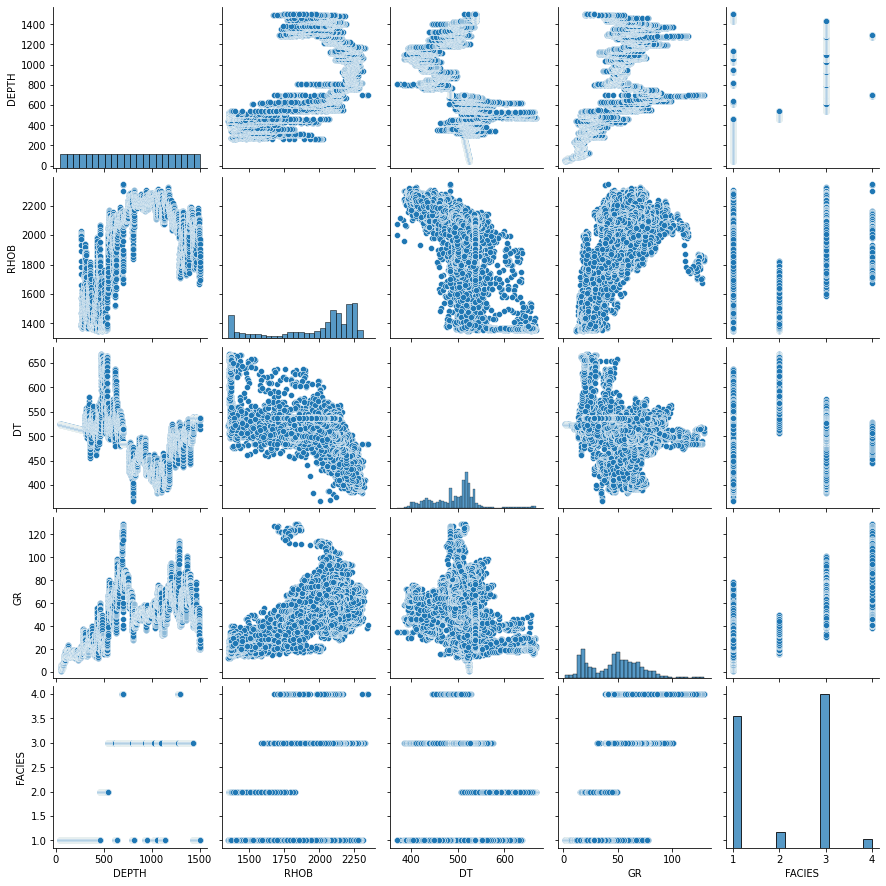

In [38]:
sns.pairplot(data)

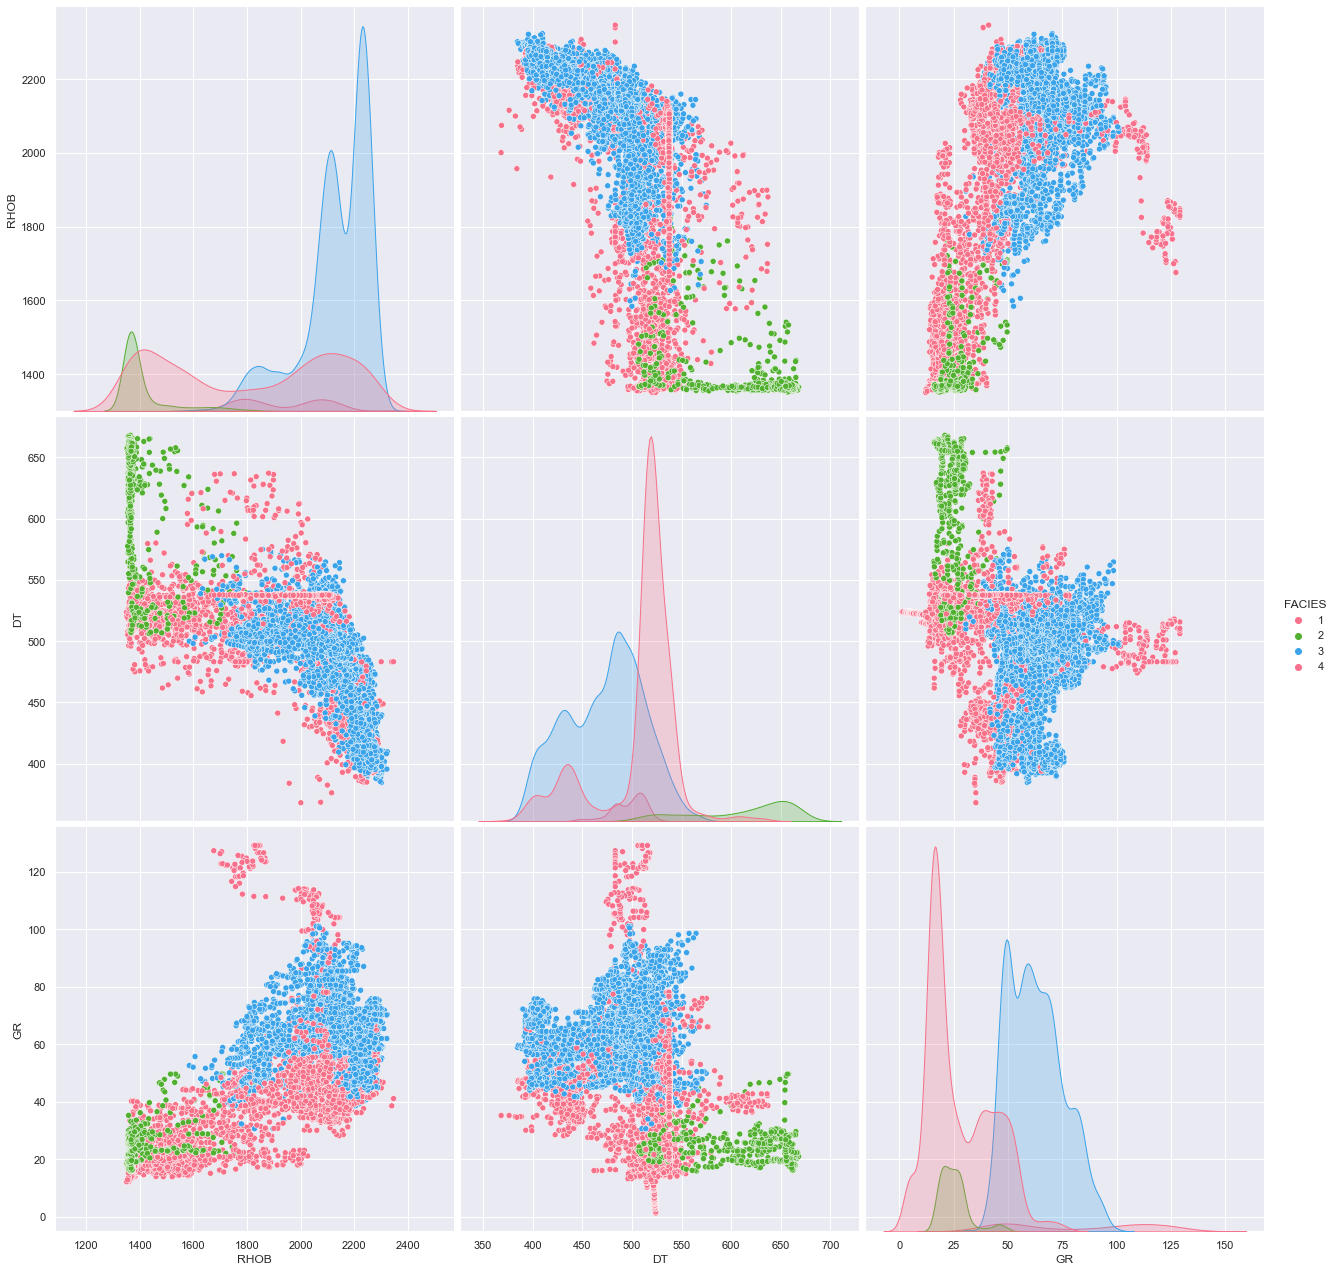

In [45]:
#sns.set(rc={"figure.figsize":(30, 30)})
sns.pairplot(data.drop("DEPTH",1), hue="FACIES", palette="husl", height=6)

# https://csegrecorder.com/articles/view/too-many-seismic-attributes

# KNN

In [51]:
data.isna().sum()

DEPTH        0
RHOB      1427
DT           0
GR          14
FACIES       0
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   9680 non-null   float64
 1   RHOB    8253 non-null   float64
 2   DT      9680 non-null   float64
 3   GR      9666 non-null   float64
 4   FACIES  9680 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 378.2 KB


In [55]:
data

,DEPTH,RHOB,DT,GR,FACIES
0,48.0000,NaN,524.0485,NaN,1
1,48.1500,NaN,524.0410,NaN,1
2,48.3000,NaN,524.0336,NaN,1
3,48.4500,NaN,524.0262,NaN,1
4,48.6000,NaN,524.0190,NaN,1
...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,1
9676,1499.4000,1814.1691,534.8610,28.5281,1
9677,1499.5500,1861.6497,537.1902,28.5813,1
9678,1499.7001,1880.3978,537.2630,28.5813,1


In [54]:
nont_NAN = data.RHOB.notnull()
data[nont_NAN]

,DEPTH,RHOB,DT,GR,FACIES
1427,262.0500,1998.9065,513.5145,20.8059,1
1428,262.2000,1989.1794,513.5073,21.1575,1
1429,262.3500,1985.5889,513.4998,21.3494,1
1430,262.5000,2008.2076,513.4924,21.1685,1
1431,262.6500,2026.0713,513.4849,21.1536,1
...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,1
9676,1499.4000,1814.1691,534.8610,28.5281,1
9677,1499.5500,1861.6497,537.1902,28.5813,1
9678,1499.7001,1880.3978,537.2630,28.5813,1


In [56]:
data_NotNAN = data[nont_NAN]

In [59]:
data_NotNAN.isna().sum()

DEPTH     0
RHOB      0
DT        0
GR        0
FACIES    0
dtype: int64

In [60]:
X=data_NotNAN[["RHOB","DT","GR"]]
y=data_NotNAN.FACIES

print(X.shape, y.shape)

(8253, 3) (8253,)


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6602, 3) (1651, 3) (6602,) (1651,)


In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn_classifier= KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn_classifier.predict(X_test)

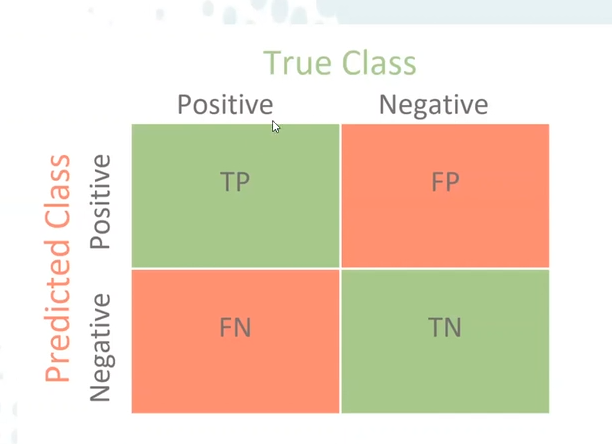

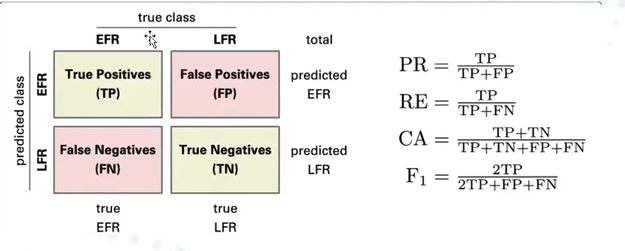

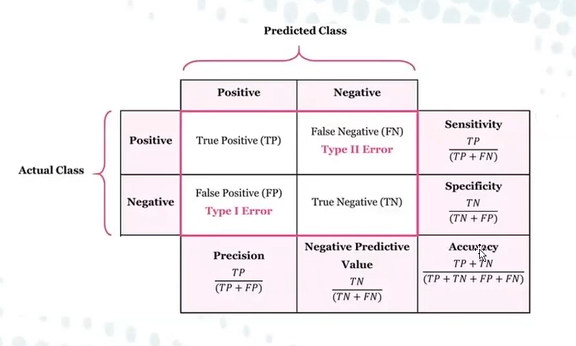

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.86      0.87       518
           2       0.93      0.79      0.85       104
           3       0.91      0.95      0.93       978
           4       0.76      0.51      0.61        51

    accuracy                           0.90      1651
   macro avg       0.87      0.78      0.82      1651
weighted avg       0.90      0.90      0.90      1651



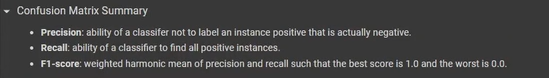

In [69]:
print(confusion_matrix(y_test, y_pred))

[[447   4  65   2]
 [ 21  82   1   0]
 [ 38   2 932   6]
 [  1   0  24  26]]


Text(292.58000000000015, 0.5, 'Truth')

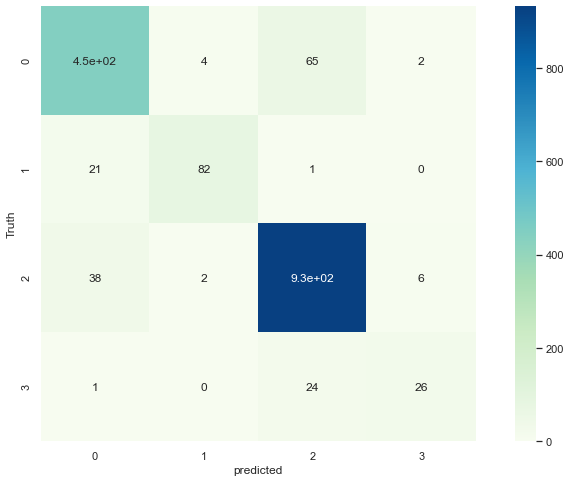

In [70]:
knn_cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1)
plt.figure(figsize=(14,8))
sns.heatmap(knn_cm, cmap="GnBu", annot=True, square=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

# day3

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
file_path = "D:\\lh_data\\geophysics\\well1.csv"
file_path

'D:\\lh_data\\geophysics\\well1.csv'

In [3]:
# loading LAS as numpy array
well = pd.read_csv(file_path)
well

,DEPTH,RHOB,DT,GR,FACIES
0,48.0000,NaN,524.0485,NaN,1
1,48.1500,NaN,524.0410,NaN,1
2,48.3000,NaN,524.0336,NaN,1
3,48.4500,NaN,524.0262,NaN,1
4,48.6000,NaN,524.0190,NaN,1
...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,1
9676,1499.4000,1814.1691,534.8610,28.5281,1
9677,1499.5500,1861.6497,537.1902,28.5813,1
9678,1499.7001,1880.3978,537.2630,28.5813,1


In [4]:
well.isna().sum()

DEPTH        0
RHOB      1427
DT           0
GR          14
FACIES       0
dtype: int64

In [5]:
NotNaN = well.RHOB.notnull()
well = well[NotNaN]
well.isna().sum()

DEPTH     0
RHOB      0
DT        0
GR        0
FACIES    0
dtype: int64

In [6]:
well.FACIES.unique()

array([1, 2, 3, 4], dtype=int64)

In [7]:
well.head()

,DEPTH,RHOB,DT,GR,FACIES
1427,262.05,1998.9065,513.5145,20.8059,1
1428,262.20,1989.1794,513.5073,21.1575,1
1429,262.35,1985.5889,513.4998,21.3494,1
1430,262.50,2008.2076,513.4924,21.1685,1
1431,262.65,2026.0713,513.4849,21.1536,1


In [8]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8253 entries, 1427 to 9679
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   8253 non-null   float64
 1   RHOB    8253 non-null   float64
 2   DT      8253 non-null   float64
 3   GR      8253 non-null   float64
 4   FACIES  8253 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 386.9 KB


In [9]:
FaciesDict = {1:"Facies1",2:"Facies2",3:"Facies3",4:"Facies4"}
well = well.replace({"FACIES":FaciesDict})
well

,DEPTH,RHOB,DT,GR,FACIES
1427,262.0500,1998.9065,513.5145,20.8059,Facies1
1428,262.2000,1989.1794,513.5073,21.1575,Facies1
1429,262.3500,1985.5889,513.4998,21.3494,Facies1
1430,262.5000,2008.2076,513.4924,21.1685,Facies1
1431,262.6500,2026.0713,513.4849,21.1536,Facies1
...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,Facies1
9676,1499.4000,1814.1691,534.8610,28.5281,Facies1
9677,1499.5500,1861.6497,537.1902,28.5813,Facies1
9678,1499.7001,1880.3978,537.2630,28.5813,Facies1


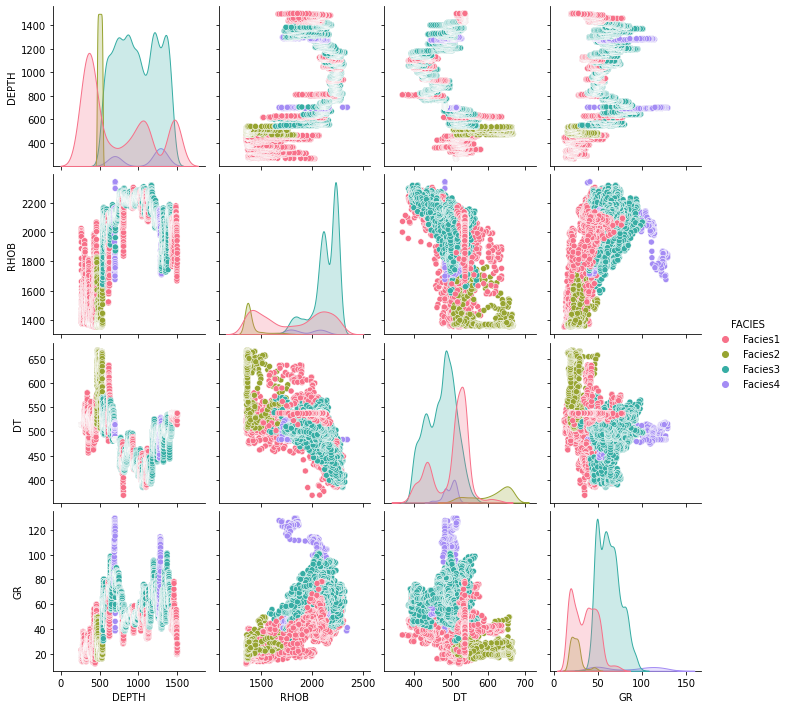

In [10]:
import seaborn as sns

sns.pairplot(well, hue="FACIES", palette="husl")

In [11]:
corrMatrix = well.drop(["DEPTH"],1).corr()
corrMatrix

,RHOB,DT,GR
RHOB,1.000000,-0.711299,0.632652
DT,-0.711299,1.000000,-0.288375
GR,0.632652,-0.288375,1.000000


<AxesSubplot:>

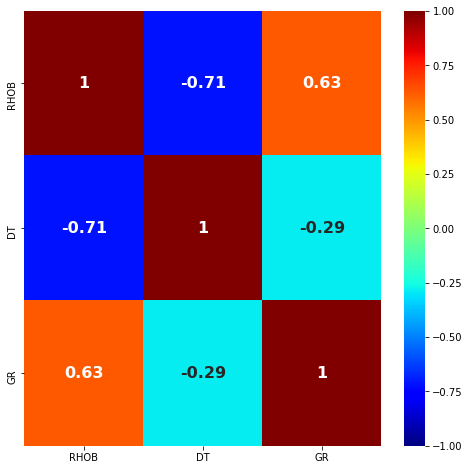

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(corrMatrix, cmap="jet", vmin=-1, vmax=1, annot=True, annot_kws={"fontsize":16, "fontweight":"bold"})

# EDA

In [13]:
X=well[["RHOB","DT","GR"]]
y=well[["FACIES"]].values
print(X.shape, y.shape)

(8253, 3) (8253, 1)


In [14]:
X

,RHOB,DT,GR
1427,1998.9065,513.5145,20.8059
1428,1989.1794,513.5073,21.1575
1429,1985.5889,513.4998,21.3494
1430,2008.2076,513.4924,21.1685
1431,2026.0713,513.4849,21.1536
...,...,...,...
9675,1787.5444,532.1727,27.6273
9676,1814.1691,534.8610,28.5281
9677,1861.6497,537.1902,28.5813
9678,1880.3978,537.2630,28.5813


In [15]:
y

array([['Facies1'],
       ['Facies1'],
       ['Facies1'],
       ...,
       ['Facies1'],
       ['Facies1'],
       ['Facies1']], dtype=object)

In [16]:
y.ravel()

array(['Facies1', 'Facies1', 'Facies1', ..., 'Facies1', 'Facies1',
       'Facies1'], dtype=object)

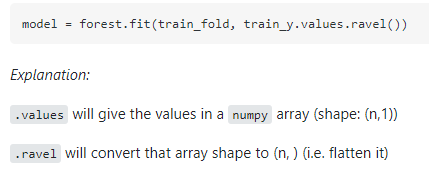

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y.ravel(),test_size=0.2, random_state=2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6602, 3) (1651, 3) (6602,) (1651,)


# Supervised learning

# SVM

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

svc_model = SVC(kernel="linear", random_state=32)

In [19]:
svc_model.fit(x_train, y_train)
svc_model_pred = svc_model.predict(x_train)

In [20]:
# Evaluate model
print("train dataset")
print("classification report")
print(classification_report(y_train,svc_model_pred))

train dataset
classification report
              precision    recall  f1-score   support

     Facies1       0.84      0.74      0.78      2160
     Facies2       0.95      0.74      0.83       396
     Facies3       0.84      0.96      0.90      3817
     Facies4       1.00      0.24      0.38       229

    accuracy                           0.85      6602
   macro avg       0.91      0.67      0.72      6602
weighted avg       0.85      0.85      0.84      6602



* Notice the inbalance nature of the Facies distribution. You may need to deal with the inbalance to make the solution less bias

In [21]:
# Evaluate model
print("train dataset")
print("confusion matrix")
print(confusion_matrix(y_train,svc_model_pred))

train dataset
confusion matrix
[[1590   16  554    0]
 [ 102  292    2    0]
 [ 157    0 3660    0]
 [  46    0  129   54]]


Text(828.9800000000002, 0.5, 'Truth')

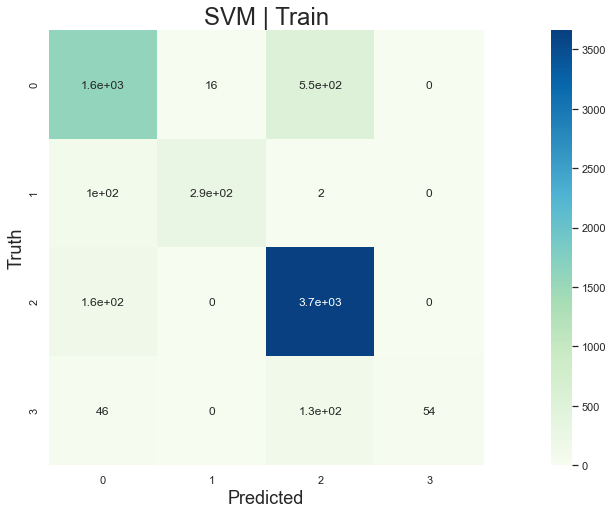

In [24]:
svc_cm = confusion_matrix(y_train,svc_model_pred)

sns.set(font_scale=1)
plt.figure(figsize=(24,8))
sns.heatmap(svc_cm, cmap="GnBu", annot=True, square=True)
plt.title("SVM | Train", fontsize=24)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Truth",fontsize=18)

train dataset
classification report
              precision    recall  f1-score   support

     Facies1       0.87      0.75      0.81       518
     Facies2       0.94      0.78      0.85       104
     Facies3       0.85      0.97      0.91       978
     Facies4       1.00      0.16      0.27        51

    accuracy                           0.86      1651
   macro avg       0.92      0.66      0.71      1651
weighted avg       0.87      0.86      0.85      1651

train dataset
confusion matrix
[[390   5 123   0]
 [ 22  81   1   0]
 [ 32   0 946   0]
 [  4   0  39   8]]


Text(828.9800000000002, 0.5, 'Truth')

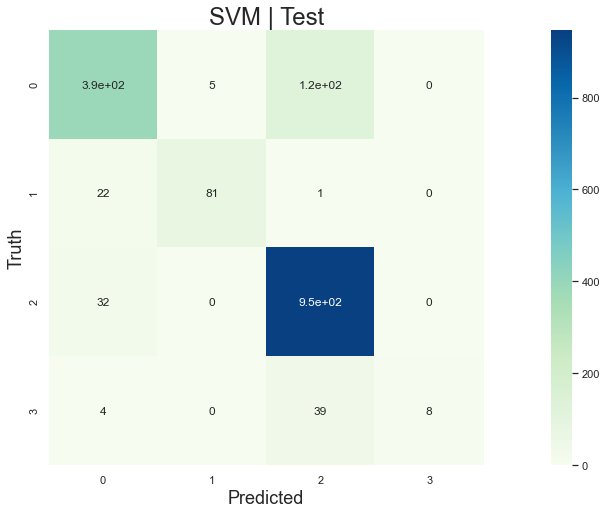

In [25]:
svc_model_pred = svc_model.predict(x_test)

# Evaluate model
print("train dataset")
print("classification report")
print(classification_report(y_test,svc_model_pred))

# Evaluate model
print("train dataset")
print("confusion matrix")
print(confusion_matrix(y_test,svc_model_pred))

svc_cm_ = confusion_matrix(y_test,svc_model_pred)

sns.set(font_scale=1)
plt.figure(figsize=(24,8))
sns.heatmap(svc_cm_, cmap="GnBu", annot=True, square=True)
plt.title("SVM | Test", fontsize=24)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Truth",fontsize=18)

Text(0.5, 0.98, 'Support Vector Machine')

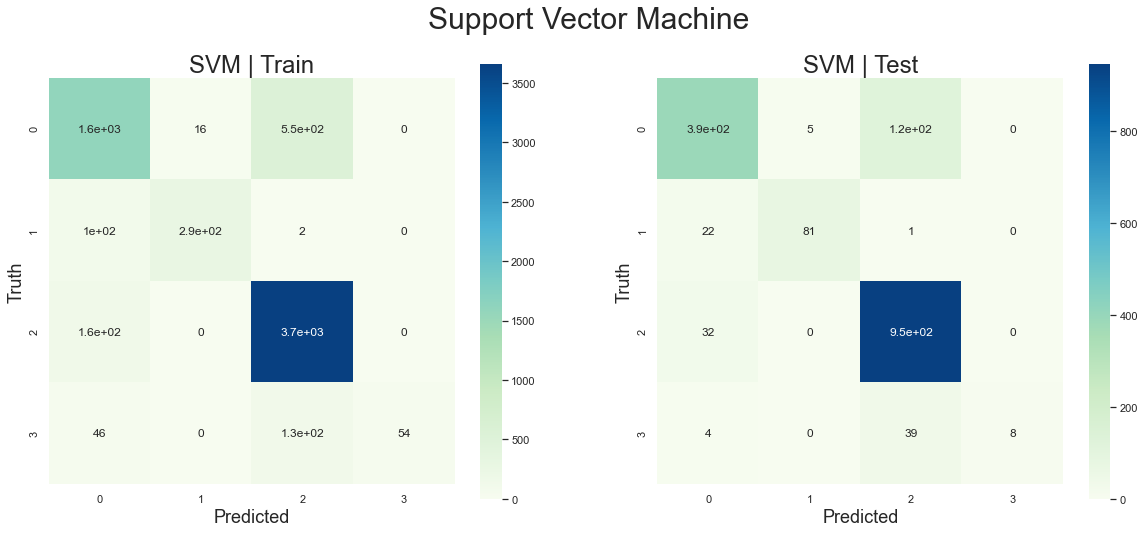

In [27]:
plt.subplots(1,2,figsize=(20,8))
sns.set(font_scale=1)

plt.subplot(1,2,1)
sns.heatmap(svc_cm, cmap="GnBu", annot=True, square=True)
plt.title("SVM | Train", fontsize=24)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Truth",fontsize=18)

plt.subplot(1,2,2)
sns.heatmap(svc_cm_, cmap="GnBu", annot=True, square=True)
plt.title("SVM | Test", fontsize=24)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Truth",fontsize=18)

plt.suptitle("Support Vector Machine", fontsize=30)

# FULL DATASET

In [28]:
well.head()

,DEPTH,RHOB,DT,GR,FACIES
1427,262.05,1998.9065,513.5145,20.8059,Facies1
1428,262.20,1989.1794,513.5073,21.1575,Facies1
1429,262.35,1985.5889,513.4998,21.3494,Facies1
1430,262.50,2008.2076,513.4924,21.1685,Facies1
1431,262.65,2026.0713,513.4849,21.1536,Facies1


In [29]:
well["SVC"] = svc_model.predict(X)  # SVC model predict facies

In [31]:
well.head()

,DEPTH,RHOB,DT,GR,FACIES,SVC
1427,262.05,1998.9065,513.5145,20.8059,Facies1,Facies1
1428,262.20,1989.1794,513.5073,21.1575,Facies1,Facies1
1429,262.35,1985.5889,513.4998,21.3494,Facies1,Facies1
1430,262.50,2008.2076,513.4924,21.1685,Facies1,Facies1
1431,262.65,2026.0713,513.4849,21.1536,Facies1,Facies1


In [32]:
# apply back dictionary 

FaciesDict = {"Facies1":1,"Facies2":2,"Facies3":3,"Facies4":3}
well = well.replace({"FACIES":FaciesDict})
well = well.replace({"SVC":FaciesDict})
well

,DEPTH,RHOB,DT,GR,FACIES,SVC
1427,262.0500,1998.9065,513.5145,20.8059,1,1
1428,262.2000,1989.1794,513.5073,21.1575,1,1
1429,262.3500,1985.5889,513.4998,21.3494,1,1
1430,262.5000,2008.2076,513.4924,21.1685,1,1
1431,262.6500,2026.0713,513.4849,21.1536,1,1
...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,1,1
9676,1499.4000,1814.1691,534.8610,28.5281,1,1
9677,1499.5500,1861.6497,537.1902,28.5813,1,1
9678,1499.7001,1880.3978,537.2630,28.5813,1,1


(1499.8501, 262.05)

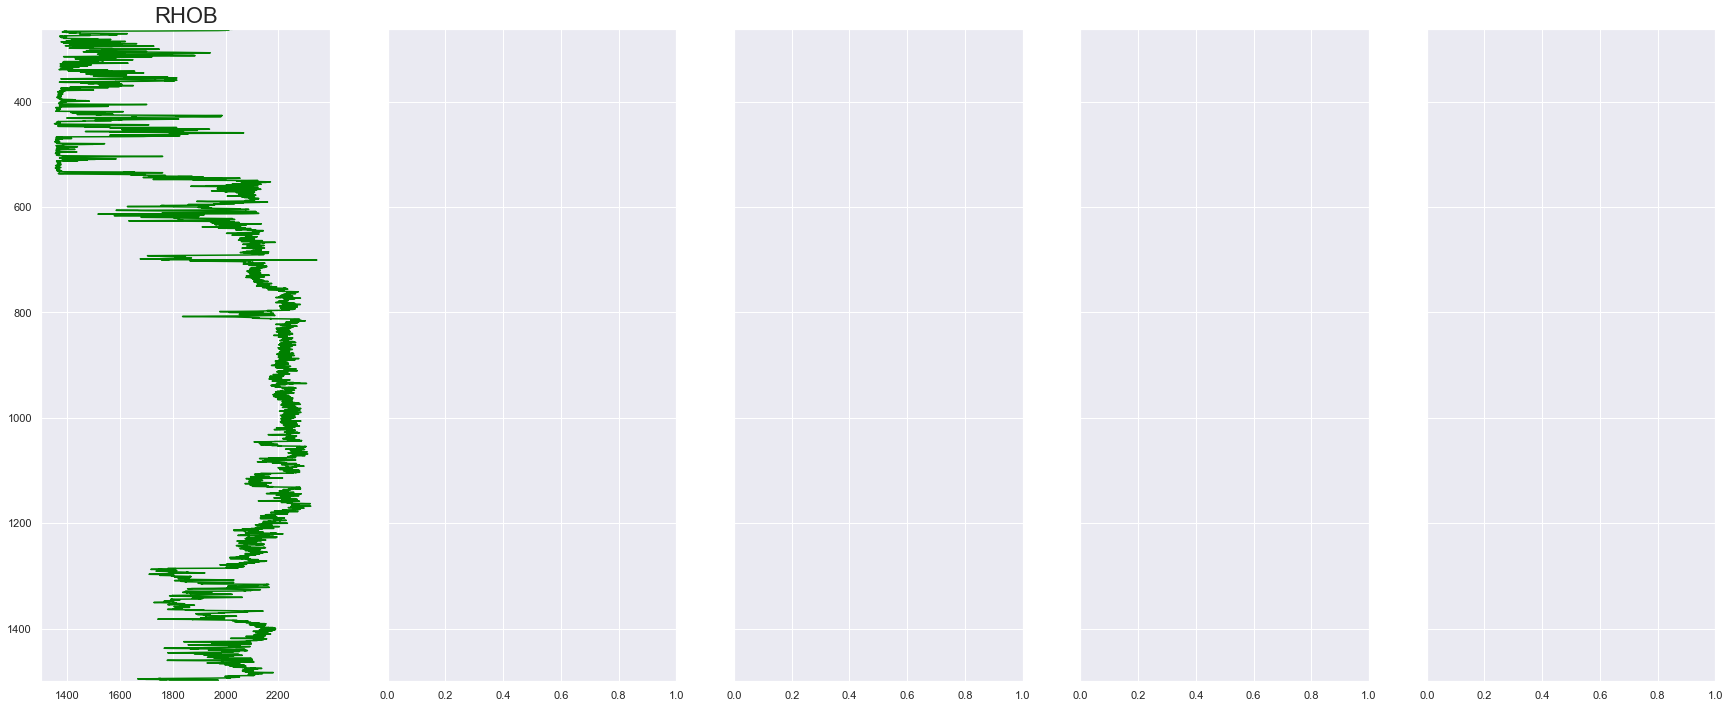

In [35]:
fix,ax = plt.subplots(1,5,figsize=(30,12), sharey=True)
ax[0].plot(well["RHOB"], well["DEPTH"], color="green")
ax[0].set_title("RHOB", fontsize="22")
ax[0].set_ylim(max(well["DEPTH"]),min(well["DEPTH"]))

ax[1].plot(well["DT"], well["DEPTH"], color="red")
ax[1].set_title("DT", fontsize="22")

ax[2].plot(well["GR"], well["DEPTH"], color="blue")
ax[2].set_title("GR", fontsize="22")

facies=np.vstack(well["FACIES"])
ax[3].imshow(facies, aspect="auto", extent=[0,1,max(well["DEPTH"]),min(well["DEPTH"])], cmap="jet")
ax[3].set_title("GR", fontsize="22")
